In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

import sys 
sys.path.insert(1, "../")
from workloads.util import use_results, use_dataset, join_queries_features, use_plots

%load_ext autoreload
%autoreload 2

In [8]:
result_dir = use_results("azure")

In [9]:
ground_truth = np.load(f"{result_dir}/ralf_full_results/azure-windows-ts-array-ground-truth.npy")
rr = np.load(f"{result_dir}/ralf_full_results/final_rr_forecasts.npy")
ce = np.load(f"{result_dir}/ralf_full_results/final_ce_forecasts.npy")
perfect = np.load(f"{result_dir}/ralf_full_results/azure-full-predictions.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sarahwooders/repos/experiments/data/results/azure/ralf_full_results/azure-windows-ts-array-ground-truth.npy'

In [10]:
ground_truth = np.load("/data/azure-windows-ts-array-ground-truth.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/data/azure-windows-ts-array-ground-truth.npy'

In [3]:
rr = np.load("final_rr_forecasts.npy")
ce = np.load("final_ce_forecasts.npy")
perfect = np.load("/data/azure-full-predictions.npy")

In [4]:
ground_truth = np.nan_to_num(ground_truth, 0)


In [5]:
mses = dict()
for forecast, label in zip([rr, ce, perfect], ["rr", "ce", "perfect"]):
    forecast = np.nan_to_num(forecast, 0)
    cross_key_mse = ((forecast-ground_truth))**2
    cross_key_mse = cross_key_mse.sum(axis=0)/np.count_nonzero(cross_key_mse, axis=0)
    assert cross_key_mse.shape == (8639,)
    mses[label] = cross_key_mse
    

In [84]:
plt.figure(figsize=(8,5))

plots = []
for label, arr in mses.items():
    print(label)
    arr[:864] = np.nan
    #pd.Series(arr).rolling(48).mean().dropna().plot(label={"rr": "Round Robin", "ce": "Regret Optimized", "perfect": "Infinite Resource"}[label])
    plot = pd.DataFrame()
    plot["error"] = pd.Series(arr).rolling(24*3).mean().dropna()
    plot["policy"] = label
    plot["timestamp"] = pd.Series(arr).rolling(24*3).mean().dropna().index
    plots.append(plot.reset_index())
    
plot_df = pd.concat(plots)

rr
ce
perfect


<Figure size 576x360 with 0 Axes>

In [85]:
plot_df

,index,error,policy,timestamp
0,935,175.677338,rr,935
1,936,175.881593,rr,936
2,937,176.100053,rr,937
3,938,176.246681,rr,938
4,939,176.452996,rr,939
...,...,...,...,...
7699,8634,86.123447,perfect,8634
7700,8635,86.156157,perfect,8635
7701,8636,86.136438,perfect,8636
7702,8637,86.108527,perfect,8637


In [86]:
import seaborn as sns

policy_map = {
    'ce': 'Query-Proportional (Regret Weighted)',
    'rr': "Round-Robin", 
    'perfect': "Best-Case"
}

hue_order = ['Query-Proportional (Regret Weighted)', "Round-Robin", "Best-Case"]

In [87]:
hue_colors = {'Query-Proportional (Regret Weighted)': (0.140625, 0.62890625, 0.28125),
 'Query-Proportional': (0.99609375, 0.51171875, 0.16796875),
 'Minimum-Past': (0.0, 0.17578125, 0.609375),
 'Maximum-Pending': (0.05859375, 0.3828125, 0.9921875),
 'Round-Robin': (0.46875, 0.66015625, 0.99609375),
 'Random': (0.6484375, 0.78125, 0.99609375),
 'Batched': (0.8125, 0.8828125, 0.99609375),
 'Best-Case': (0.55078125, 0.55078125, 0.55078125)}

In [88]:
plot_df.policy = plot_df.policy.map(policy_map)

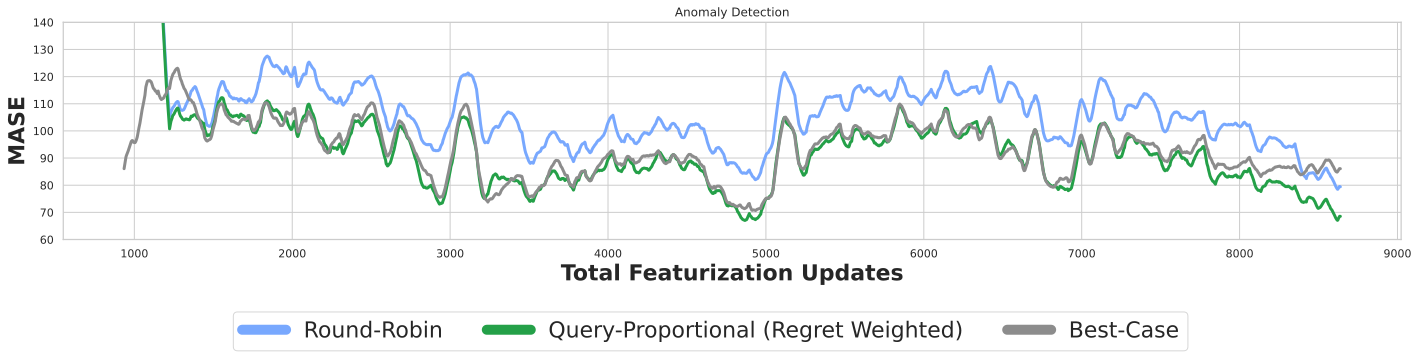

In [92]:
fig, axes = plt.subplots(1, 1, figsize=(24,4))

g = sns.lineplot(data=plot_df.reset_index(), x="timestamp", y="error", hue="policy", palette=hue_colors, linewidth=3)
axes.set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE", ylim=(60, 140))
axes.set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
axes.set_ylabel("MASE", fontsize=22, fontweight="bold")
#axes.set_title("Anomaly Detection", fontsize=26)
g.legend_.remove()

handles, labels = axes.get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
leg = fig.legend(handles, labels, fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.3))

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
    
fig.savefig('ralf_azure.pdf', dpi=300, bbox_inches = "tight")

In [49]:
plot_df.reset_index()

,level_0,index,error,policy,timestamp
0,0,911,167.951551,NaN,911
1,1,912,168.161476,NaN,912
2,2,913,168.335407,NaN,913
3,3,914,168.503783,NaN,914
4,4,915,168.926939,NaN,915
...,...,...,...,...,...
23179,7723,8634,86.270696,NaN,8634
23180,7724,8635,86.425203,NaN,8635
23181,7725,8636,86.566091,NaN,8636
23182,7726,8637,86.710067,NaN,8637
